# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** M Mahfudl Awaludin
- **Email:** Mahfudlawaludin.26@gmail.com

### Dataset 
Penulis: Hadi Fanaee-T
Laboratorium Kecerdasan Buatan dan Dukungan Keputusan (LIAAD), Universitas Porto, Portugal

### Latar Belakang
Sistem penyewaan sepeda berbagi (bike sharing) adalah generasi baru dari penyewaan sepeda tradisional yang prosesnya sepenuhnya otomatis, mulai dari keanggotaan hingga penyewaan dan pengembalian sepeda. Saat ini, ada lebih dari 500 program bike sharing di seluruh dunia dengan lebih dari 500.000 sepeda. Sistem ini menarik perhatian karena peranannya dalam masalah lalu lintas, lingkungan, dan kesehatan. Selain aplikasi dunia nyata, data yang dihasilkan oleh sistem ini sangat berguna untuk penelitian, karena durasi perjalanan dan lokasi keberangkatan dan kedatangan tercatat dengan jelas.



## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana prediksi tren penyewaan sepeda berdasarkan data historis harian dan per jam?
- Pertanyaan 2 : Apakah cuaca mempengaruhi faktor jumlah penyewaan sepeda?
- Pertanyaan 3 : Bagaimana cara mengukur tingkat keterlibatan pelanggan dengan layanan penyewaan berdasarkan waktu terakhir mereka menyewa, seberapa sering mereka menyewa, dan seberapa banyak mereka menghabiskan untuk penyewaan?

### Import Semua Packages/Library yang Digunakan

In [1]:
# mengimport library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

mengimpor beberapa library utama yang digunakan untuk analisis data dan visualisasi, yaitu:
1. numpy: Digunakan untuk operasi numerik dan manipulasi array, seperti perhitungan statistik dan pengelolaan data numerik.
2. pandas: Digunakan untuk manipulasi dan analisis data, khususnya dalam bentuk tabel (DataFrame) seperti yang Anda lakukan dengan dataset hour_data.
3. matplotlib.pyplot: Digunakan untuk membuat visualisasi grafik, seperti plot dan diagram untuk memvisualisasikan data.
4. seaborn: Digunakan untuk membuat visualisasi statistik yang lebih informatif dan estetis, serta dapat bekerja dengan pandas DataFrame untuk plotting yang lebih kompleks.

### Data Wrangling

Data Wrangling adalah proses membersihkan, mengorganisir, dan mempersiapkan data mentah agar siap digunakan untuk analisis lebih lanjut. Tujuannya adalah untuk membuat data lebih mudah dikelola, dimengerti, dan diekstraksi nilai-nilai pentingnya.
<br>
Untuk memastikan data tersebut sudah dalam format yang sesuai untuk diproses lebih lanjut, data wrangling memiliki tahapan-tahapan untuk membersihkan, mengubah, dan menyusun data sesuai dengan kebutuhan analisis, yakni:

1. gathering data: proses pengumpulan data. Pada tahap ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.
2. Assesing Data: proses penilaian data. Pada tahap ini kita akan menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.
3. Cleaning Data: pada proses Assesing kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data.

### Gathering Data

Gathering data adalah proses pengumpulan data dari berbagai sumber untuk tujuan analisis, penelitian, atau pembuatan keputusan.
Disini adalah proses untuk meload dataset

In [2]:
# Hour_data 
hour_data = pd.read_csv('dataset/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
# Day_data
day_data = pd.read_csv('dataset/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data yang dimuat memiliki kolom yang lengkap dengan informasi terkait penyewaan sepeda berdasarkan jam dan hari.

### Assessing Data
merupakan proses yang bertujuan untuk mengidentifikasi masalah yang terdapat dalam data dan memastikan data tersebut berkualitas.<br>
Tahapan-tahapan yang dilakukan yaitu :
1. Missing value
2. Duplicate data
3. Outlier

**1. Menilai Data hour_data**

In [4]:
# Mengecek informasi mengenai tipe data dan nilai null hour data
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Mengecek missing value
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Mengecek data duplikasi
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


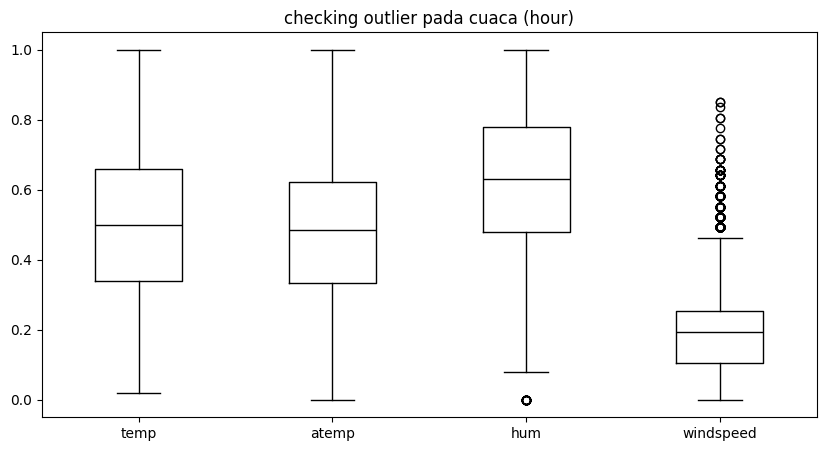

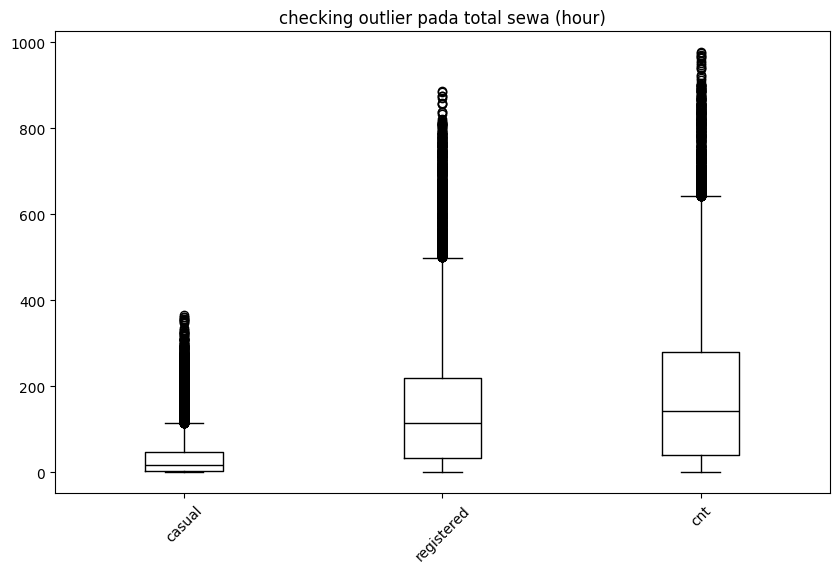

In [7]:
# mengecek outlier pada hour_data
plt.figure(figsize=(10, 5))
hour_data.boxplot(column=['temp', 'atemp', 'hum','windspeed'], color='black')
plt.title('checking outlier pada cuaca (hour)')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 6))
hour_data.boxplot(column=['casual', 'registered', 'cnt'], color='black')
plt.title('checking outlier pada total sewa (hour)')
plt.xticks(rotation=45)
0
plt.grid(False)
plt.show()


In [8]:
# Mengecek jumlah outlier pada hour_data
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
outliers_iqr = detect_outliers_iqr(hour_data, numeric_columns)
for col, outlier_data in outliers_iqr.items():
    print(f"Outliers for column {col}: {len(outlier_data)} rows")


Outliers for column temp: 0 rows
Outliers for column atemp: 0 rows
Outliers for column hum: 22 rows
Outliers for column windspeed: 342 rows
Outliers for column casual: 1192 rows
Outliers for column registered: 680 rows
Outliers for column cnt: 505 rows


In [9]:
# Mengecek unique Value
unik = [ 'yr', 'mnth', 'holiday', 'weekday','workingday','season', 'weathersit']
for col in unik:
    unique_val = hour_data[col].unique()
    print(f'Unique values terdapat pada kolom {col}:')
    print(unique_val)

Unique values terdapat pada kolom yr:
[0 1]
Unique values terdapat pada kolom mnth:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values terdapat pada kolom holiday:
[0 1]
Unique values terdapat pada kolom weekday:
[6 0 1 2 3 4 5]
Unique values terdapat pada kolom workingday:
[0 1]
Unique values terdapat pada kolom season:
[1 2 3 4]
Unique values terdapat pada kolom weathersit:
[1 2 3 4]


**Insight**
- hour_data memiliki 17 kolom dan 17379 baris
- Tipe Data dteday berupa Object
- Terdapat data yang berada di outlier

**2. Menilai Data day_data**

In [11]:
# Mengecek informasi mengenai tipe data dan nilai null hour data
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


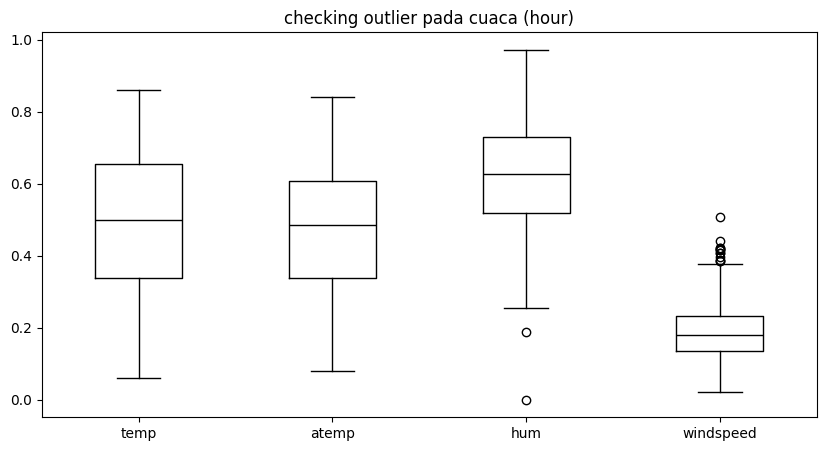

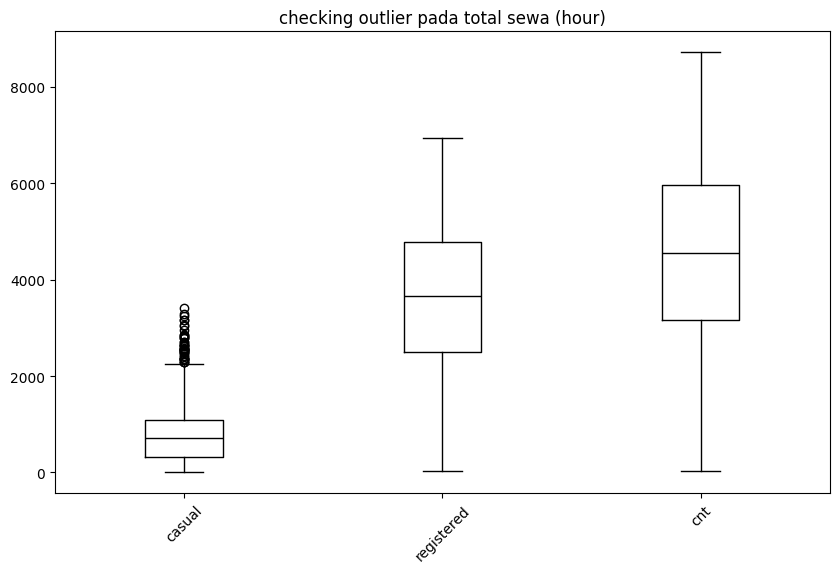

In [14]:
# mengecek outlier pada hour_data
plt.figure(figsize=(10, 5))
day_data.boxplot(column=['temp', 'atemp', 'hum','windspeed'], color='black')
plt.title('checking outlier pada cuaca (hour)')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 6))
day_data.boxplot(column=['casual', 'registered', 'cnt'], color='black')
plt.title('checking outlier pada total sewa (hour)')
plt.xticks(rotation=45)
0
plt.grid(False)
plt.show()

In [15]:
# Mengecek jumlah outlier pada hour_data
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
outliers_iqr = detect_outliers_iqr(day_data, numeric_columns)
for col, outlier_data in outliers_iqr.items():
    print(f"Outliers for column {col}: {len(outlier_data)} rows")


Outliers for column temp: 0 rows
Outliers for column atemp: 0 rows
Outliers for column hum: 2 rows
Outliers for column windspeed: 13 rows
Outliers for column casual: 44 rows
Outliers for column registered: 0 rows
Outliers for column cnt: 0 rows


In [16]:
# Mengecek unique Value
unik = [ 'yr', 'mnth', 'holiday', 'weekday','workingday','season', 'weathersit']
for col in unik:
    unique_val = day_data[col].unique()
    print(f'Unique values terdapat pada kolom {col}:')
    print(unique_val)

Unique values terdapat pada kolom yr:
[0 1]
Unique values terdapat pada kolom mnth:
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique values terdapat pada kolom holiday:
[0 1]
Unique values terdapat pada kolom weekday:
[6 0 1 2 3 4 5]
Unique values terdapat pada kolom workingday:
[0 1]
Unique values terdapat pada kolom season:
[1 2 3 4]
Unique values terdapat pada kolom weathersit:
[2 1 3]


**Insight**
- hour_data memiliki 16 kolom dan 732 baris
- Tipe Data dteday berupa Object
- Terdapat data yang berada di outlier

### Cleaning Data
adalah proses mengidentifikasi dan memperbaiki masalah atau ketidaksesuaian dalam dataset untuk memastikan data tersebut akurat, konsisten, dan siap untuk dianalisis lebih lanjut. Proses ini sangat penting karena data yang kotor atau tidak terstruktur dapat memengaruhi hasil analisis dan keputusan yang diambil.<br>
Tahapan yang dilakukan yaitu:
1. Menyesuaikan nama kolom yang ambigu
2. Mengubah tipe data yang sesuai
3. melakukan dropping data outlier

**1. Membersihkan data hour_data**

In [18]:
# Mengganti nama kolom yang ambigu
new_column_names = {
    'instant': 'index',  # Jika 'instant' merupakan ID atau index
    'dteday': 'date',    # Ganti 'dteday' menjadi 'date'
    'season': 'season',  # 'season' sudah jelas
    'yr': 'year',        # Ganti 'yr' menjadi 'year'
    'mnth': 'month',     # Ganti 'mnth' menjadi 'month'
    'hr': 'hour',        # Ganti 'hr' menjadi 'hour'
    'holiday': 'is_holiday',  # 'holiday' bisa diganti menjadi 'is_holiday'
    'weekday': 'weekday',  # 'weekday' sudah jelas, bisa ditambahkan keterangan jika perlu
    'workingday': 'is_working_day',  # Ganti 'workingday' menjadi 'is_working_day'
    'weathersit': 'weather_situation',  # 'weathersit' lebih jelas jika diganti menjadi 'weather_situation'
    'temp': 'temperature',  # 'temp' menjadi 'temperature'
    'atemp': 'apparent_temperature',  # 'atemp' menjadi 'apparent_temperature'
    'hum': 'humidity',  # 'hum' menjadi 'humidity'
    'windspeed': 'windspeed',  # 'windspeed' sudah jelas
    'casual': 'casual_rentals',  # 'casual' lebih jelas jika diganti menjadi 'casual_rentals'
    'registered': 'registered_rentals',  # 'registered' menjadi 'registered_rentals'
    'cnt': 'total_rentals'  # 'cnt' menjadi 'total_rentals'
}

# Mengganti nama kolom di DataFrame
hour_data.rename(columns=new_column_names, inplace=True)

# Memeriksa hasil penggantian nama kolom
print(hour_data.columns)


Index(['index', 'date', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_working_day', 'weather_situation', 'temperature',
       'apparent_temperature', 'humidity', 'windspeed', 'casual_rentals',
       'registered_rentals', 'total_rentals'],
      dtype='object')


In [19]:
# Menampilkan 5 baris pertama dari DataFrame setelah nama kolom diperbarui
print(hour_data.head())

   index        date  season  year  month  hour  is_holiday  weekday  \
0      1  2011-01-01       1     0      1     0           0        6   
1      2  2011-01-01       1     0      1     1           0        6   
2      3  2011-01-01       1     0      1     2           0        6   
3      4  2011-01-01       1     0      1     3           0        6   
4      5  2011-01-01       1     0      1     4           0        6   

   is_working_day  weather_situation  temperature  apparent_temperature  \
0               0                  1         0.24                0.2879   
1               0                  1         0.22                0.2727   
2               0                  1         0.22                0.2727   
3               0                  1         0.24                0.2879   
4               0                  1         0.24                0.2879   

   humidity  windspeed  casual_rentals  registered_rentals  total_rentals  
0      0.81        0.0               3  

In [20]:
# Mengubah tipe data yang sesuai
hour_data['date'] = pd.to_datetime(hour_data['date'])

In [21]:
# Mengecek hasil perubahan
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 17379 non-null  int64         
 1   date                  17379 non-null  datetime64[ns]
 2   season                17379 non-null  int64         
 3   year                  17379 non-null  int64         
 4   month                 17379 non-null  int64         
 5   hour                  17379 non-null  int64         
 6   is_holiday            17379 non-null  int64         
 7   weekday               17379 non-null  int64         
 8   is_working_day        17379 non-null  int64         
 9   weather_situation     17379 non-null  int64         
 10  temperature           17379 non-null  float64       
 11  apparent_temperature  17379 non-null  float64       
 12  humidity              17379 non-null  float64       
 13  windspeed       

In [23]:
# melakukan mapping tiap Kolom dengan Unique Value (ganti dengan nama yang sesuai)
change = {0 : 2011, 1 : 2012}
hour_data.replace({'year': change}, inplace=True)
change = { 1 : 'Jan' , 2 : 'Feb' , 3 : 'Mar' , 4 : 'Apr' , 5 : 'May' , 6 : 'Jun' , 7 : 'Jul' , 8 : 'Aug', 9 : 'Sep' , 10 : 'Oct' , 11 : 'Nov' , 12 : 'Dec' }
hour_data.replace({'month': change}, inplace=True)
change = {0 : "Not holiday", 1 : "Holiday"}
hour_data.replace({'is_holiday': change}, inplace=True)
change = {0 : 'Sunday', 1 : 'Monday',  2 : 'Tuesday',  3 : 'Wednesday',  4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday' }
hour_data.replace({'weekday': change}, inplace=True)
change = {0 : "Not Workday", 1 : "Workingday"}
hour_data.replace({'is_working_day': change}, inplace=True)
change = { 1 : 'Spring' , 2 : 'Summer' , 3 : 'Fall' , 4 : 'Winter' }
hour_data.replace({'season': change}, inplace=True)
change = { 1 : 'Clear/Few clouds' , 2 : 'Cloudy/Broken clouds' , 3 : 'Light Rain/Snow' , 4 : 'Heavy Rain/Snow' }
hour_data.replace({'weather_situation': change}, inplace=True)
hour_data

,index,date,season,year,month,hour,is_holiday,weekday,is_working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,Spring,2011,Jan,0,Not holiday,Saturday,Not Workday,Clear/Few clouds,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Not holiday,Saturday,Not Workday,Clear/Few clouds,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Not holiday,Saturday,Not Workday,Clear/Few clouds,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Not holiday,Saturday,Not Workday,Clear/Few clouds,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Not holiday,Saturday,Not Workday,Clear/Few clouds,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,Not holiday,Monday,Workingday,Cloudy/Broken clouds,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Dec,20,Not holiday,Monday,Workingday,Cloudy/Broken clouds,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Dec,21,Not holiday,Monday,Workingday,Clear/Few clouds,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Dec,22,Not holiday,Monday,Workingday,Clear/Few clouds,0.26,0.2727,0.56,0.1343,13,48,61


In [25]:
# Drop Data Outlier
print("==========penyelesaian outlier dalam data Hour===========")
Q1 = hour_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']].quantile(0.25)
Q3 = hour_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']].quantile(0.75)
IQR = Q3 - Q1

max_val = Q3 + (1.5 * IQR)
min_val = Q1 - (1.5 * IQR)

under = (hour_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']] < min_val).any(axis=1)
upper = (hour_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']] > max_val).any(axis=1)

hour_data.drop(hour_data[under].index, inplace=True)
hour_data.drop(hour_data[upper].index, inplace=True)
hour_data.info()

==========penyelesaian outlier dalam data Hour===========
<class 'pandas.core.frame.DataFrame'>
Index: 15220 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 15220 non-null  int64         
 1   date                  15220 non-null  datetime64[ns]
 2   season                15220 non-null  object        
 3   year                  15220 non-null  int64         
 4   month                 15220 non-null  object        
 5   hour                  15220 non-null  int64         
 6   is_holiday            15220 non-null  object        
 7   weekday               15220 non-null  object        
 8   is_working_day        15220 non-null  object        
 9   weather_situation     15220 non-null  object        
 10  temperature           15220 non-null  float64       
 11  apparent_temperature  15220 non-null  float64       
 12  humidity             

C:\Users\user\AppData\Local\Temp\ipykernel_11940\2968464705.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_data.drop(hour_data[upper].index, inplace=True)


**2. Membersihkan data day_data**

In [26]:
# Mengganti nama kolom yang ambigu
# Mengganti nama kolom
day_data.columns = ['index', 'date', 'season', 'year', 'month', 'is_holiday', 
               'weekday', 'is_working_day', 'weather_situation', 'temperature', 
               'apparent_temperature', 'humidity', 'windspeed', 'casual_rentals', 
               'registered_rentals', 'total_rentals']

# Menampilkan 5 baris pertama dari DataFrame setelah nama kolom diperbarui
print(day_data.head())


   index        date  season  year  month  is_holiday  weekday  \
0      1  2011-01-01       1     0      1           0        6   
1      2  2011-01-02       1     0      1           0        0   
2      3  2011-01-03       1     0      1           0        1   
3      4  2011-01-04       1     0      1           0        2   
4      5  2011-01-05       1     0      1           0        3   

   is_working_day  weather_situation  temperature  apparent_temperature  \
0               0                  2     0.344167              0.363625   
1               0                  2     0.363478              0.353739   
2               1                  1     0.196364              0.189405   
3               1                  1     0.200000              0.212122   
4               1                  1     0.226957              0.229270   

   humidity  windspeed  casual_rentals  registered_rentals  total_rentals  
0  0.805833   0.160446             331                 654            985  


In [27]:
# Mengubah tipe data yang sesuai
day_data['date'] = pd.to_datetime(day_data['date'])

In [28]:
# Mengecek hasil perubahan
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 731 non-null    int64         
 1   date                  731 non-null    datetime64[ns]
 2   season                731 non-null    int64         
 3   year                  731 non-null    int64         
 4   month                 731 non-null    int64         
 5   is_holiday            731 non-null    int64         
 6   weekday               731 non-null    int64         
 7   is_working_day        731 non-null    int64         
 8   weather_situation     731 non-null    int64         
 9   temperature           731 non-null    float64       
 10  apparent_temperature  731 non-null    float64       
 11  humidity              731 non-null    float64       
 12  windspeed             731 non-null    float64       
 13  casual_rentals      

In [29]:
# melakukan mapping tiap Kolom dengan Unique Value (ganti dengan nama yang sesuai)

change = {0 : 2011, 1 : 2012}
day_data.replace({'year': change}, inplace=True)
change = { 1 : 'Jan' , 2 : 'Feb' , 3 : 'Mar' , 4 : 'Apr' , 5 : 'May' , 6 : 'Jun' , 7 : 'Jul' , 8 : 'Aug', 9 : 'Sep' , 10 : 'Oct' , 11 : 'Nov' , 12 : 'Dec' }
day_data.replace({'month': change}, inplace=True)
change = {0 : "Not holiday", 1 : "Holiday"}
day_data.replace({'is_holiday': change}, inplace=True)
change = {0 : 'Su', 1 : 'Mo',  2 : 'Tu',  3 : 'We',  4 : 'Th', 5 : 'Fr', 6 : 'Sa' }
day_data.replace({'weekday': change}, inplace=True)
change = {0 : "Not Workday", 1 : "Workingday"}
day_data.replace({'is_working_day': change}, inplace=True)
change = { 1 : 'Spring' , 2 : 'Summer' , 3 : 'Fall' , 4 : 'Winter' }
day_data.replace({'season': change}, inplace=True)
change = { 1 : 'Clear/Few clouds' , 2 : 'Cloudy/Broken clouds' , 3 : 'Light Rain/Snow' , 4 : 'Heavy Rain/Snow' }
day_data.replace({'weather_situation': change}, inplace=True)
day_data

,index,date,season,year,month,is_holiday,weekday,is_working_day,weather_situation,temperature,apparent_temperature,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
0,1,2011-01-01,Spring,2011,Jan,Not holiday,Sa,Not Workday,Cloudy/Broken clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Not holiday,Su,Not Workday,Cloudy/Broken clouds,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Not holiday,Mo,Workingday,Clear/Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Not holiday,Tu,Workingday,Clear/Few clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Not holiday,We,Workingday,Clear/Few clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,Dec,Not holiday,Th,Workingday,Cloudy/Broken clouds,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,Dec,Not holiday,Fr,Workingday,Cloudy/Broken clouds,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,Dec,Not holiday,Sa,Not Workday,Cloudy/Broken clouds,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,Dec,Not holiday,Su,Not Workday,Clear/Few clouds,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [31]:
print("==========penyelesaian outlier dalam data Day===========")
Q1 = day_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']].quantile(0.25)
Q3 = day_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']].quantile(0.75)
IQR = Q3 - Q1

max_val = Q3 + (1.5 * IQR)
min_val = Q1 - (1.5 * IQR)

under = (day_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']] < min_val).any(axis=1)
upper = (day_data[['windspeed', 'casual_rentals', 'humidity', 'registered_rentals', 'total_rentals']] > max_val).any(axis=1)


day_data.drop(day_data[under].index, inplace=True)
day_data.drop(day_data[upper].index, inplace=True)
day_data.info()
print()

==========penyelesaian outlier dalam data Day===========
<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 673 non-null    int64         
 1   date                  673 non-null    datetime64[ns]
 2   season                673 non-null    object        
 3   year                  673 non-null    int64         
 4   month                 673 non-null    object        
 5   is_holiday            673 non-null    object        
 6   weekday               673 non-null    object        
 7   is_working_day        673 non-null    object        
 8   weather_situation     673 non-null    object        
 9   temperature           673 non-null    float64       
 10  apparent_temperature  673 non-null    float64       
 11  humidity              673 non-null    float64       
 12  windspeed             673 

C:\Users\user\AppData\Local\Temp\ipykernel_11940\3072866779.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_data.drop(day_data[upper].index, inplace=True)


**Insight:**
- mengubah nama kolom agar lebih jelas
- mengubah tipe data yang belum sesuai
- melakukan mapping pada unique value
- membenahi data yang terdapat di outlier (melakukan dropping)
tahap data wragling pun selesai dan akan dilanjutkan exploratory Data Analysis

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) adalah proses awal dalam analisis data yang bertujuan untuk memahami karakteristik data sebelum dilakukan pemodelan lebih lanjut. EDA membantu menemukan pola, mendeteksi anomali yang ada pada data, memahami distribusi data, dan menemukan hubungan antar variabel.

### Explore Statistik Data

In [32]:
# menampilkan statistik data hour_data
hour_data.describe()

,index,date,year,hour,temperature,apparent_temperature,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
count,15220.000000,15220,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000
mean,8445.179435,2011-12-22 22:40:20.183968512,2011.476150,11.162155,0.481527,0.462608,0.644687,0.180528,23.756439,123.994350,147.750788
min,1.000000,2011-01-01 00:00:00,2011.000000,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4111.750000,2011-06-25 00:00:00,2011.000000,5.000000,0.320000,0.318200,0.500000,0.104500,3.000000,27.000000,32.000000
50%,8274.500000,2011-12-16 00:00:00,2011.000000,11.000000,0.480000,0.469700,0.650000,0.164200,13.000000,99.000000,118.000000
75%,12753.250000,2012-06-20 00:00:00,2012.000000,18.000000,0.640000,0.606100,0.810000,0.253700,37.000000,184.000000,228.000000
max,17379.000000,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,1.000000,0.462700,114.000000,499.000000,594.000000
std,5025.796656,NaN,0.499447,7.156157,0.190921,0.170642,0.188477,0.112051,26.554718,113.590486,131.067353


**Insight**
- Data lengkap dengan 15.220 entri.
- Penyewaan sepeda: Rata-rata casual: 23, registered: 124, total: 148.
- Jam penyewaan: Rata-rata pada jam 11.
- Suhu: Rata-rata 0.48, kelembaban: 0.64.
- Kecepatan angin: Rata-rata 0.18.
- Penyewaan tertinggi: 594 total penyewaan, 0 minimum.

In [33]:
# menampilkan statistik data hour_data
day_data.describe()

,index,date,year,temperature,apparent_temperature,humidity,windspeed,casual_rentals,registered_rentals,total_rentals
count,673.000000,673,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,357.989599,2011-12-23 23:45:01.337295872,2011.475483,0.489420,0.469105,0.632846,0.186662,738.934621,3628.787519,4367.722140
min,1.000000,2011-01-01 00:00:00,2011.000000,0.059130,0.079070,0.275833,0.022392,2.000000,20.000000,22.000000
25%,175.000000,2011-06-24 00:00:00,2011.000000,0.329167,0.326379,0.524583,0.134329,304.000000,2482.000000,3068.000000
50%,349.000000,2011-12-15 00:00:00,2011.000000,0.484167,0.470950,0.630833,0.178479,678.000000,3614.000000,4401.000000
75%,545.000000,2012-06-28 00:00:00,2012.000000,0.653333,0.607958,0.734583,0.230725,1031.000000,4709.000000,5633.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,0.861667,0.840896,0.972500,0.378108,2258.000000,6946.000000,8173.000000
std,212.108768,NaN,0.499770,0.185105,0.164610,0.140467,0.072436,523.019213,1578.680984,1863.248953


**Insight**
- Data lengkap dengan 673 entri.
- Penyewaan sepeda: Rata-rata casual: 739, registered: 3629, total: 4368.
- Suhu: Rata-rata 0.49, kelembaban: 0.63.
- Kecepatan angin: Rata-rata 0.19.
- Penyewaan tertinggi: 8173 total penyewaan, 2 minimum.

### Explore Visualisasi Data

**1. Visualisasi Data hour_data**

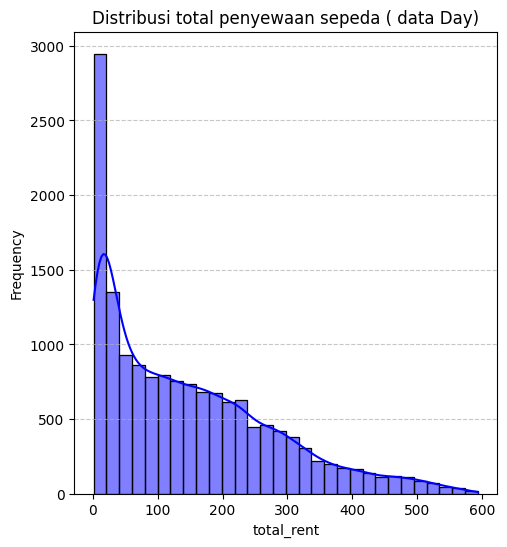

In [37]:
# Visualisasi distribusi total penyewaan sepeda per jam
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(hour_data['total_rentals'], bins=30, kde=True, color='blue')
plt.title('Distribusi total penyewaan sepeda ( data Day)')
plt.xlabel('total_rent')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**1. Visualisasi Data day_data**

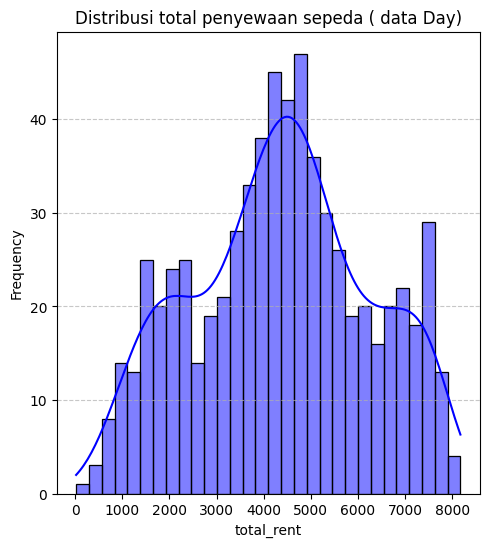

In [36]:
# Visualisasi distribusi total penyewaan sepeda per hari
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.histplot(day_data['total_rentals'], bins=30, kde=True, color='blue')
plt.title('Distribusi total penyewaan sepeda ( data Day)')
plt.xlabel('total_rent')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- distribusi total penyewaan sepeda pada data per hari merupakan well skewed
- distribusi penyewaan sepeda pada data per jam merupakan right skewed

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana prediksi tren penyewaan sepeda berdasarkan data historis harian dan per jam?
- Analisis:
1. Gunakan moving average atau rolling mean untuk melihat tren penyewaan berdasarkan data harian dan per jam.
2. Identifikasi hari-hari dengan penyewaan di atas rata-rata atau di bawah rata-rata untuk menemukan pola tertentu.

- Visualisasi:
1. Moving average plot untuk total rentals (harian & per jam).
2. Bar chart untuk hari-hari dengan anomali penyewaan tinggi/rendah.     buat kode ini


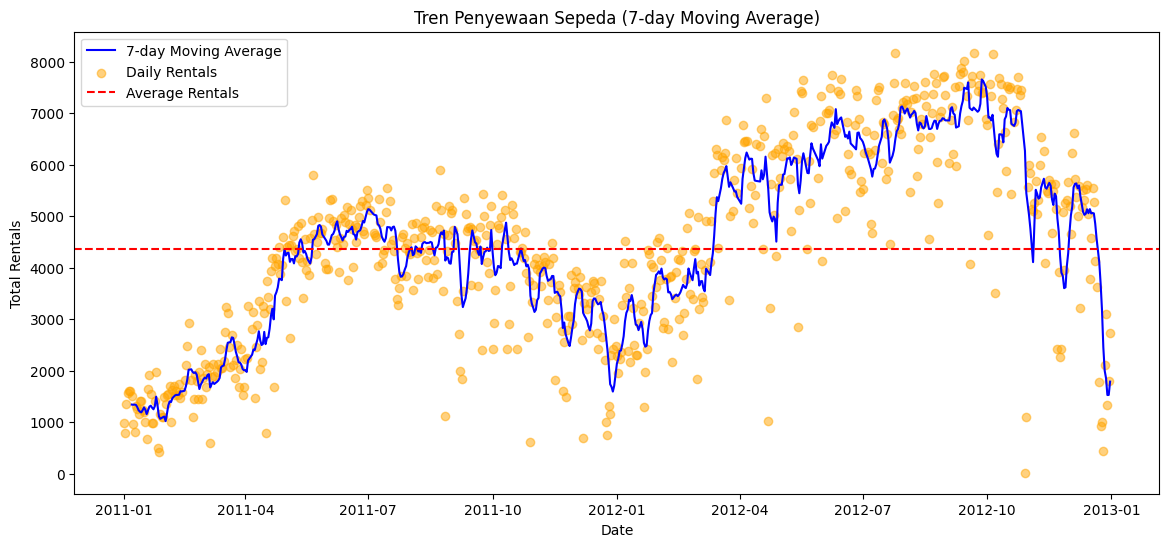

In [62]:
# Sorting data berdasarkan tanggal
hour_data = hour_data.sort_values(by="date")
day_data = day_data.sort_values(by="date")

# Hitung Moving Average
hour_data['rolling_mean'] = hour_data['total_rentals'].rolling(window=24).mean()  # 24 jam rata-rata
day_data['rolling_mean'] = day_data['total_rentals'].rolling(window=7).mean()  # 7 hari rata-rata

# Identifikasi hari dengan penyewaan di atas/bawah rata-rata
mean_rentals = day_data['total_rentals'].mean()
std_rentals = day_data['total_rentals'].std()

# Hari di atas/bawah rata-rata
day_data['rental_category'] = day_data['total_rentals'].apply(lambda x: 'High' if x > (mean_rentals + std_rentals) else ('Low' if x < (mean_rentals - std_rentals) else 'Normal'))

# Visualisasi Moving Average
plt.figure(figsize=(14, 6))
plt.plot(day_data['date'], day_data['rolling_mean'], label='7-day Moving Average', color='blue')
plt.scatter(day_data['date'], day_data['total_rentals'], label='Daily Rentals', alpha=0.5, color='orange')
plt.axhline(mean_rentals, color='red', linestyle='dashed', label='Average Rentals')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Tren Penyewaan Sepeda (7-day Moving Average)')
plt.legend()
plt.show()

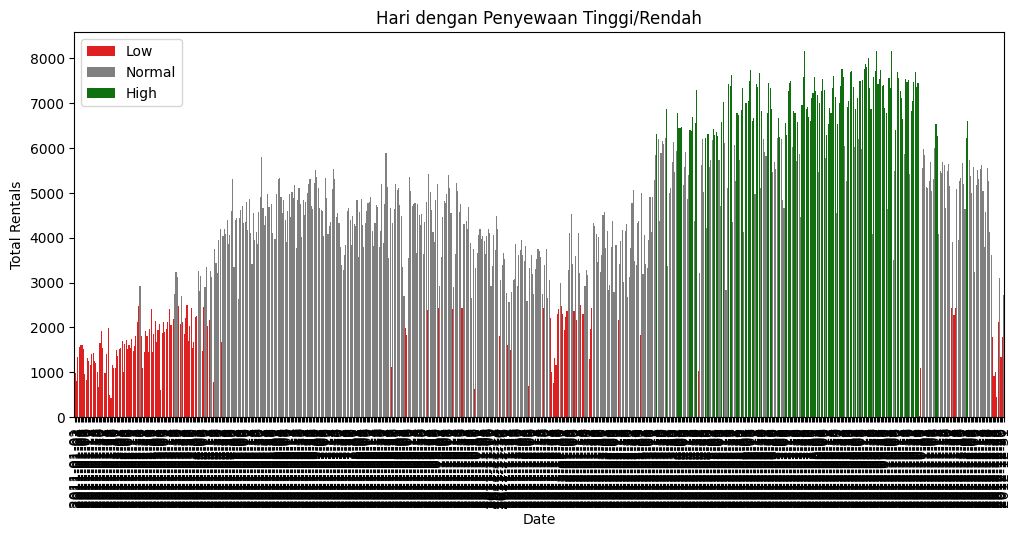

In [63]:
# Visualisasi Hari dengan Anomali Penyewaan
plt.figure(figsize=(12, 5))
sns.barplot(x=day_data['date'].dt.strftime('%Y-%m-%d'), y=day_data['total_rentals'], hue=day_data['rental_category'], palette={'High': 'green', 'Low': 'red', 'Normal': 'gray'})
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Hari dengan Penyewaan Tinggi/Rendah')
plt.legend()
plt.show()

**Insight:**<br>
Ya, berdasarkan hasil visualisasi diatas terlihat bahwa :
- Pola Musiman: Penyewaan meningkat hingga pertengahan 2012 sebelum menurun di akhir tahun, kemungkinan dipengaruhi cuaca dan kebiasaan pengguna.
- Pengaruh Cuaca: Cuaca buruk (hujan/salju) menyebabkan penurunan penyewaan, sementara cuaca cerah meningkatkan permintaan.
- Fluktuasi Harian: Lonjakan penyewaan terjadi pada hari tertentu, kemungkinan akhir pekan atau liburan.
- Peluang Optimasi: Penyesuaian strategi operasional dan promosi dapat meningkatkan efisiensi dan keuntungan layanan penyewaan sepeda.

### Pertanyaan 2: Apakah cuaca mempengaruhi faktor jumlah penyewaan sepeda?
Visualisasi: Bar plot untuk membandingkan distribusi jumlah penyewaan pada hari kerja dan hari libur.

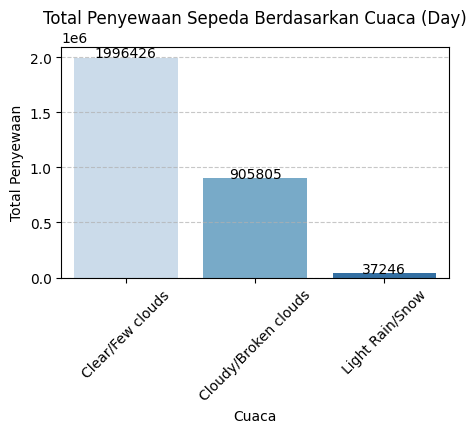

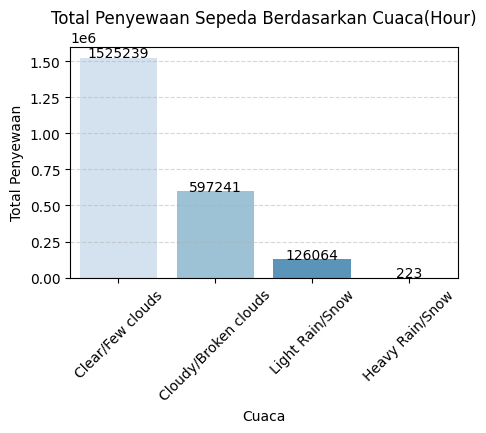

In [66]:
result = day_data.groupby(by="weather_situation").agg({
    "registered_rentals": "sum",
    "casual_rentals": "sum",
    "total_rentals":  "sum"
}).sort_values(by="total_rentals", ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(data=result.reset_index(), x="weather_situation", y="total_rentals", hue="weather_situation", palette="Blues")
for index, value in enumerate(result["total_rentals"]):
    plt.text(index, value + 100, f"{int(value)}", ha='center', fontsize=10)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca (Day)')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


result = hour_data.groupby(by="weather_situation").agg({
    "registered_rentals": "sum",
    "casual_rentals": "sum",
    "total_rentals":  "sum"
}).sort_values(by="total_rentals", ascending=False)

plt.figure(figsize=(5, 3))
sns.barplot(data=result.reset_index(), x="weather_situation", y="total_rentals", hue="weather_situation", palette="Blues")
for index, value in enumerate(result["total_rentals"]):
    plt.text(index, value + 100, f"{int(value)}", ha='center', fontsize=10)
plt.title('Total Penyewaan Sepeda Berdasarkan Cuaca(Hour)')
plt.xlabel('Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

**Insight:**<br>
Berdasarkan hasil visualisasi, cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.
- Cuaca cerah atau sedikit berawan (Clear/Few Clouds) memiliki jumlah penyewaan tertinggi, menunjukkan bahwa kondisi cuaca yang baik meningkatkan minat pengguna.
- Cuaca buruk seperti hujan deras atau salju (Heavy Rain/Snow) menyebabkan penurunan drastis dalam jumlah penyewaan, kemungkinan karena kondisi jalan yang tidak mendukung dan kurangnya kenyamanan bagi pengguna.

## Analisis Lanjutan (Opsional)


### Explore : 3. Bagaimana cara mengukur tingkat keterlibatan pelanggan dengan layanan penyewaan berdasarkan waktu terakhir mereka menyewa, seberapa sering mereka menyewa, dan seberapa banyak mereka menghabiskan untuk penyewaan?

Penjelasan: Untuk mengukur tingkat keterlibatan, kita perlu melihat tiga faktor utama:
- Recency: Seberapa baru penyewaan terakhir yang dilakukan oleh pelanggan?
- Frequency: Seberapa sering pelanggan melakukan penyewaan dalam periode tertentu?
- Monetary: Berapa banyak total penyewaan yang telah dilakukan oleh pelanggan?     buatkan kode ini     kode lengkapnya

In [53]:
import pandas as pd

# Gabungkan data dari dua dataset
df = pd.concat([hour_data, day_data])

# Menentukan tanggal referensi (terakhir dalam dataset)
reference_date = df["date"].max()

# Menghitung RFM dengan Named Aggregation
rfm = df.groupby("casual_rentals").agg(
    Recency=("date", lambda x: (reference_date - x.max()).days),
    Frequency=("date", "count"),
    Monetary=("total_rentals", "sum")
).reset_index()

# Menghitung skor RFM (1-5) menggunakan kuantil
rfm["R_Score"] = pd.qcut(rfm["Recency"], 5, labels=[5, 4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 5, labels=[1, 2, 3, 4, 5])

# Menggabungkan skor RFM menjadi satu string
rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

# Fungsi untuk segmentasi pelanggan berdasarkan skor RFM
def segment_customer(score):
    if score in ['555', '554', '545', '544']:
        return 'Best Customers'
    elif score in ['543', '535', '534', '533']:
        return 'Loyal Customers'
    elif score in ['525', '524', '523', '515']:
        return 'Big Spenders'
    elif score in ['451', '452', '453', '454']:
        return 'Almost Lost'
    elif score in ['311', '322', '321', '211']:
        return 'Lost Customers'
    else:
        return 'Regular Customers'

# Menentukan segmen pelanggan
rfm["Customer_Segment"] = rfm["RFM_Score"].apply(segment_customer)

# Menampilkan hasil
print(rfm)


     casual_rentals  Recency  Frequency  Monetary R_Score F_Score M_Score  \
0                 0        0       1547     20399       5       5       5   
1                 1        1       1052     26409       5       5       5   
2                 2        0        780     28509       5       5       5   
3                 3        0        690     37797       5       5       5   
4                 4        0        544     35784       5       5       5   
..              ...      ...        ...       ...     ...     ...     ...   
622            2234      156          1      6685       4       4       3   
623            2235      450          1      5409       2       4       3   
624            2247      142          1      6299       4       4       3   
625            2252       79          1      7109       4       4       4   
626            2258      590          1      5805       1       4       3   

    RFM_Score   Customer_Segment  
0         555     Best Customers  
1    

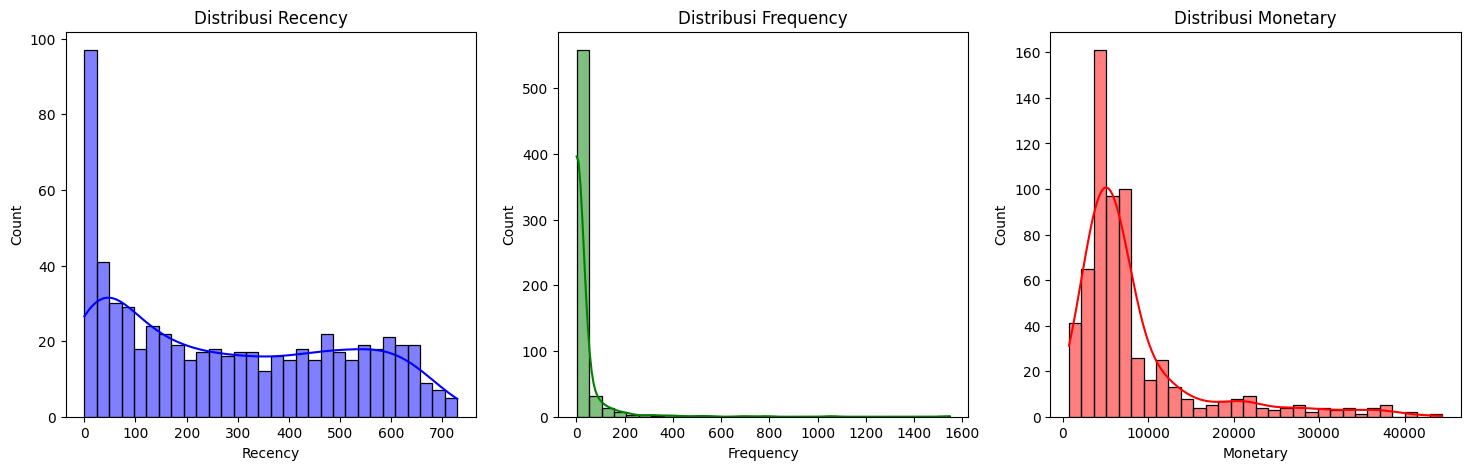

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribusi Recency")

sns.histplot(rfm["Frequency"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribusi Frequency")

sns.histplot(rfm["Monetary"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribusi Monetary")

plt.show()


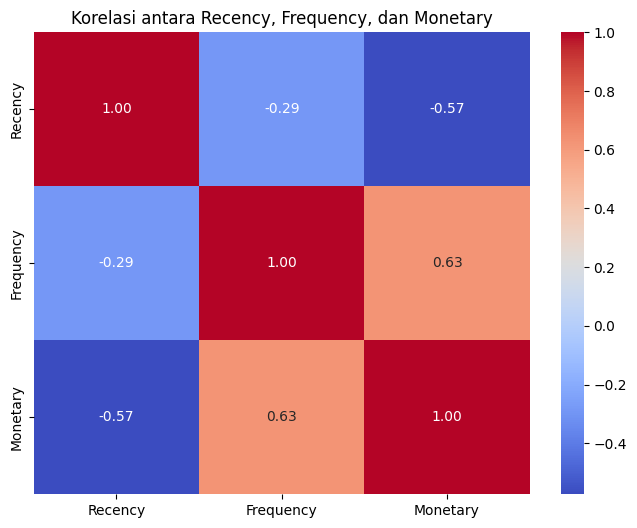

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm[["Recency", "Frequency", "Monetary"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Recency, Frequency, dan Monetary")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11940\3371263933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=rfm["Customer_Segment"], palette="coolwarm", order=rfm["Customer_Segment"].value_counts().index)


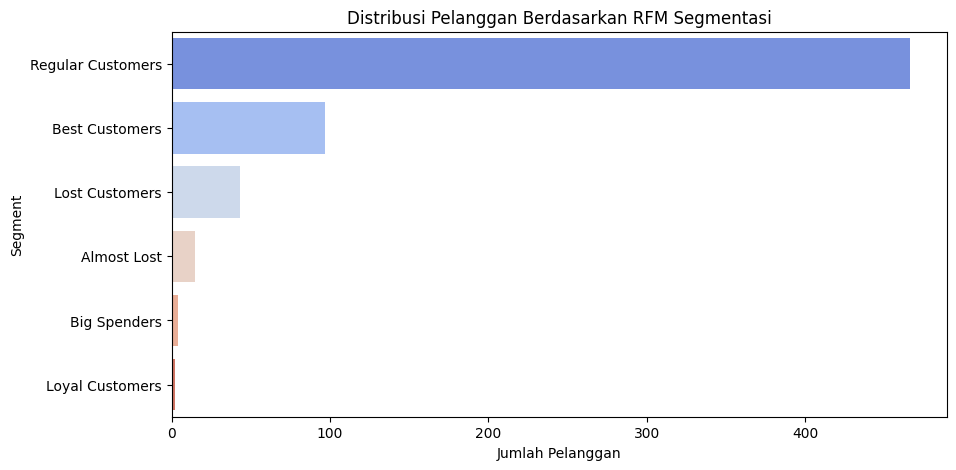

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(y=rfm["Customer_Segment"], palette="coolwarm", order=rfm["Customer_Segment"].value_counts().index)
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Segment")
plt.title("Distribusi Pelanggan Berdasarkan RFM Segmentasi")
plt.show()


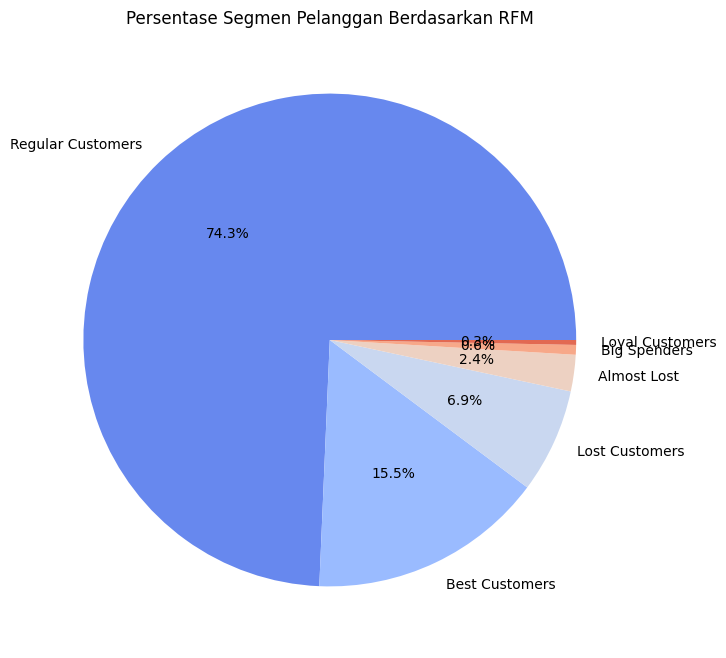

In [61]:
plt.figure(figsize=(8, 8))
rfm["Customer_Segment"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("coolwarm", n_colors=6))
plt.ylabel("")
plt.title("Persentase Segmen Pelanggan Berdasarkan RFM")
plt.show()


**Insight:**<br>
- Regular Customers mendominasi, menunjukkan basis pelanggan setia dengan transaksi rutin.
- Best Customers bernilai tinggi, perlu dipertahankan dengan insentif loyalitas.
- Lost & Almost Lost Customers butuh strategi reaktivasi, seperti promo atau pengingat.
- Big Spenders & Loyal Customers masih sedikit, bisa ditingkatkan dengan paket premium atau reward eksklusif.

## Conclusion

**Pertanyaan 1: Bagaimana prediksi tren penyewaan sepeda berdasarkan data historis harian dan per jam?**
Tren penyewaan sepeda menunjukkan pola musiman yang jelas, dengan peningkatan bertahap hingga pertengahan 2012 sebelum menurun tajam di akhir tahun. Moving average mengindikasikan adanya lonjakan pada periode tertentu, kemungkinan dipengaruhi oleh faktor cuaca, musim, atau kebiasaan pengguna. Fluktuasi harian menunjukkan hari-hari dengan penyewaan tinggi dan rendah di luar rata-rata. Penurunan signifikan di akhir 2012 bisa disebabkan oleh faktor eksternal seperti cuaca buruk atau perubahan permintaan

**Pertanyaan 2: Apakah cuaca mempengaruhi faktor jumlah penyewaan sepeda?**
Ya, sangat mempengaruhi, berdasarkan hasil analisis yang telah dilakukan dan terlihat pada visualisasi data diatas, penyewaan sepeda paling banyak terjadi saat cuaca sedang cerah. sedangkan pada saat cuaca sedang hujan, penyewaan sepeda menurun drastis hal ini menunjukkan bahwa banyak dari penyewa sepeda yang jarang keluar saat cuaca sedang tidak baik.

**Pertanyaan 3: Bagaimana cara mengukur tingkat keterlibatan pelanggan dengan layanan penyewaan berdasarkan waktu terakhir mereka menyewa, seberapa sering mereka menyewa, dan seberapa banyak mereka menghabiskan untuk penyewaan?**
Hasil segmentasi pelanggan berdasarkan analisis RFM menunjukkan bahwa mayoritas pelanggan termasuk dalam kategori Regular Customers, yang menandakan adanya basis pengguna yang cukup stabil dengan frekuensi penyewaan yang konsisten. Best Customers juga memiliki jumlah yang cukup signifikan, sehingga penting untuk mempertahankan mereka dengan program loyalitas atau insentif khusus. Di sisi lain, segmen Lost Customers dan Almost Lost Customers mengindikasikan adanya pelanggan yang mulai jarang atau bahkan berhenti menggunakan layanan, sehingga diperlukan strategi reaktivasi seperti penawaran khusus atau pengingat melalui email/SMS. Sementara itu, jumlah Big Spenders dan Loyal Customers masih sangat sedikit, yang menunjukkan peluang untuk meningkatkan keterlibatan dan pengeluaran pelanggan melalui paket premium atau program eksklusif. Dengan strategi pemasaran yang tepat, layanan penyewaan ini dapat mengoptimalkan retensi pelanggan dan meningkatkan nilai transaksi.